# Music Preferences Prediction Machine Learning Model

## Check the directory whether we have our dataset in it or not.

In [1]:
!ls

'Music Preference Prediction.ipynb'   music.csv


## Check whether CUDA is enabled or not (Although it is not required for training on CSV dataset)

In [22]:
import torch # importing PyTorch
print(torch.cuda.is_available())

True


## Install Packages

### Install `pandas` module

```bash
pip3 install pandas
```

### Install scikit learn, scipy and matplotlib

```bash
pip3 install -U scikit-learn scipy matplotlib
```

In [11]:
import pandas as pd # importing pandas library and calling it pd
from sklearn.tree import DecisionTreeClassifier # importing DecisionTreeClassifier from scikit learn

music_data = pd.read_csv('music.csv') # reading data and storing the data  to music_data
X = music_data.drop(columns = ['genre'])
y = music_data['genre']

model = DecisionTreeClassifier()
model.fit(X, y)

predictions = model.predict([ [21,1], [22, 0], [50, 0] ])
print(predictions)

['HipHop' 'Dance' 'Classical']


/home/fahim/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2)

model.fit(X_train, y_train)
prediction = model.predict(X_test)

score = accuracy_score(y_test, prediction)
print(score)

1.0


In [19]:
from sklearn import tree
tree.export_graphviz (model, out_file = 'music-recommender.dot', 
                      feature_names = ['age', 'gender'],
                      class_names = sorted(y.unique()),
                      label = 'all',
                      rounded = True,
                      filled = True)

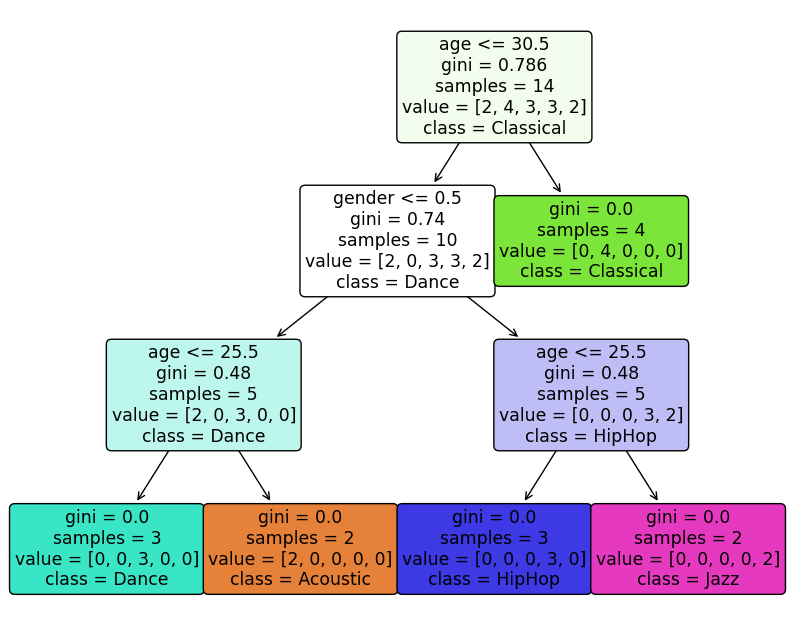

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is my trained decision tree model
plt.figure(figsize=(10, 8))
plot_tree(model, feature_names=['age', 'gender'], class_names=sorted(y.unique()), filled=True, rounded=True)
plt.show()
